In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [50]:
dir_path = "../result/"
file_len = 0
result = []

for (root, directories, files) in os.walk(dir_path):
    files = sorted(files)
    for file in files:
        if '.csv' in file and 'avg' not in file:
            print(file)
            file_len += 1
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            result.append(df.target)
print('Total files: ', file_len)

output_1.csv
output_2.csv
output_3.csv
output_4.csv
output_5.csv
Total files:  5


In [51]:
avg_result = np.sum(result, axis=0) / file_len
print(avg_result)
print(len(avg_result))

[3.49039288 4.41631055 1.44659276 ... 3.27804594 3.87943645 5.18078442]
1100


In [26]:
submit = pd.read_csv('../sample/sample_submission.csv')
print(submit.head())
print(len(submit))

                          id  target
0  boostcamp-sts-v1-test-000     3.5
1  boostcamp-sts-v1-test-001     2.1
2  boostcamp-sts-v1-test-002     2.3
3  boostcamp-sts-v1-test-003     1.0
4  boostcamp-sts-v1-test-004     4.0
1100


In [27]:
submit.target = avg_result
submit.head()

,id,target
0,boostcamp-sts-v1-test-000,3.704317
1,boostcamp-sts-v1-test-001,4.549315
2,boostcamp-sts-v1-test-002,1.380439
3,boostcamp-sts-v1-test-003,0.153535
4,boostcamp-sts-v1-test-004,4.174840


In [28]:
submit.to_csv('avg_result.csv', index=0)

In [42]:
len(result)

5

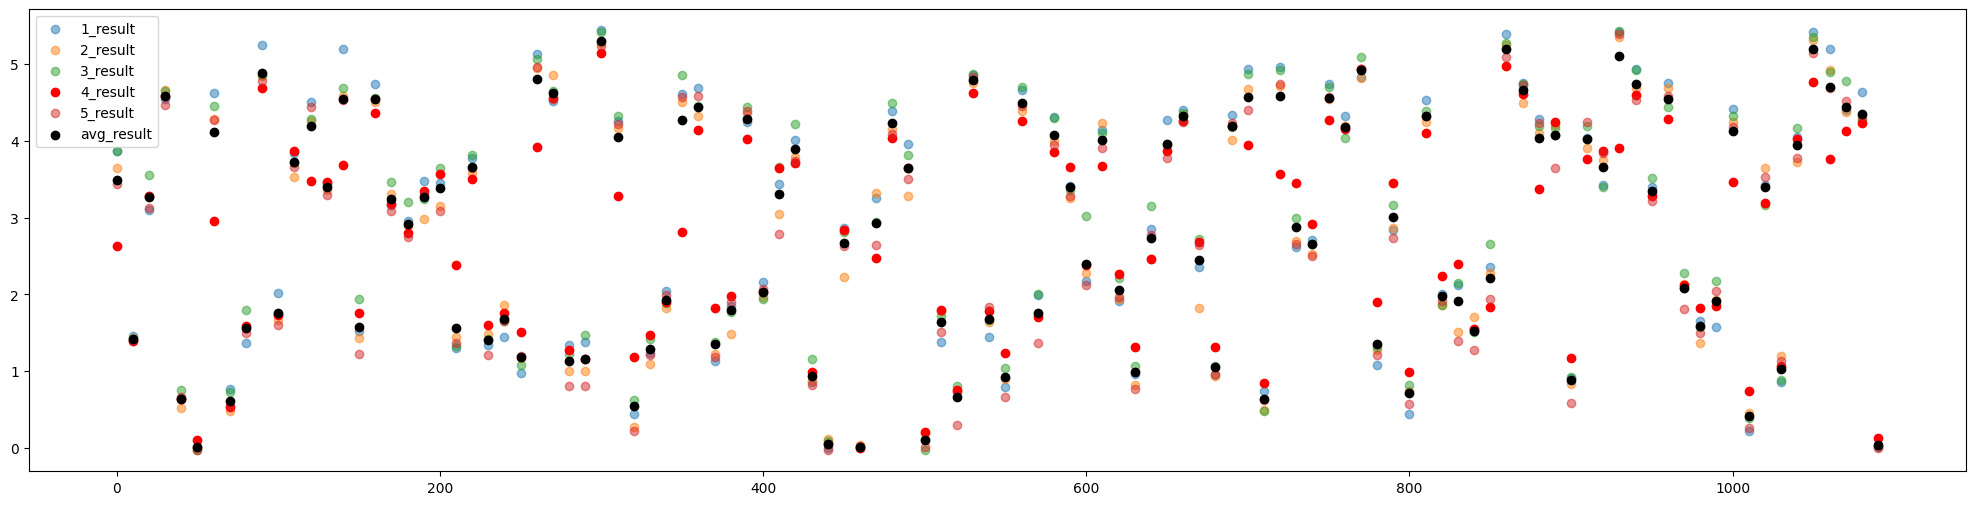

In [53]:
plt.figure(figsize=(25, 6))
interval = 10

for i in range(file_len):
    if i == 3:
        plt.scatter(x=range(0, 1100)[::interval], y=result[i][::interval], label=f'{i+1}_result', alpha=1, color='red')
    else:
        plt.scatter(x=range(0, 1100)[::interval], y=result[i][::interval], label=f'{i+1}_result', alpha=0.5)
plt.scatter(x=range(0, 1100)[::interval], y=avg_result[::interval], label=f'avg_result', alpha=1, color='black')
plt.legend()
plt.show()

In [74]:
std = []
for i in range(len(result)):
    std.append(np.std([x[i] for x in result]))
sum(std) / len(result)

0.21168837863330714

In [90]:
temp = result

In [92]:
temp.pop(3)

0       2.634698
1       3.884294
2       1.711209
3       0.369438
4       4.138547
          ...   
1095    1.871361
1096    3.371114
1097    3.752692
1098    3.868431
1099    4.965093
Name: target, Length: 1100, dtype: float64

In [94]:
std = []
for i in range(len(temp)):
    std.append(np.std([x[i] for x in temp]))
sum(std) / len(temp)

0.15020245172257177